# TP noté - 22 avril 2024 

Commencez par indiquer dans cette cellule vos noms et prénoms puis sauvegardez ce fichier sous le format NOM_PRENOM_TP_note_2.ipynb 

NOM : Solar

Prénom : Alexis



**À 20h précises le 26 avril 2024 au plus tard, vous devrez avoir rendu ce devoir sous Moodle. Aucun retard ni aucun envoi direct ne sera accepté.** 

Ce TP est individuel, **toute échange de réponse ou de code est interdite**.

Ce notebook est concu pour que vous puissiez répondre aux questions dans ce fichier. N'hésitez pas à ajouter des celules si besoin. N'oubliez pas que vous pouvez changer la fonction d'une cellule entre code/Markdown suivant que vous écrivez des commandes ou commentez des sorties. 

**Une partie importante de la note est réservée aux commentaires/justifications qui accompagnent les commandes R et leurs sorties. Des points supplémentaires seront attribués pour la présentation générale du notebook (gestion des cellules) et si les graphiques sont particulièrement soignés.**


## Import of Libraries

In [1]:
library("ggplot2")
library(GGally)
library(car)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Le chargement a nécessité le package : carData



# Jeu de données du décathlon

Ce jeu de données contient les résultats de deux compétitions de décathlon, lors de deux rencontres d'athlétisme qui ont eu lieu à un mois d'intervalle en 2004 : les jeux olympiques d'Athènes les 23 et 24 août et le Decastar 2004 qui a eu lieu les 25 et 26 septembre. Pour ces deux compétitions, on dispose pour chaque athlète des informations suivantes :
- La performance sur chacune des 10 épreuves : 100 mètres `100m`, saut en longeur `Long.jump`, lancer du poids `Shot.put`, saut en hauteur `High.jump`, 400 mètres `400m`, 110 mètres haies `110m.hurdle`, lancer du disque `discus`, saut à la perche `Pole.vault`, lancer du javelot `Javelin`, 1500 mètres `1500m`.
- Le nombre total de points `Points` (pour chaque épreuve, un athlète gagne des points en fonction de ses performances, ici on somme le total de points).
- Le rang final. 

Le jeu de données est disponible dans le fichier decathlon.txt disponible sous Moodle. 



## Importation et premières analyses 

**Question 1** : Décrivez les données :
 - Combien d'individus ? 
 - Combien de variables ?
 - Quelles sont les variables et leurs caractéristiques ? 
 - Regarder les corrélations bivariées et commenter les résultats qui vous semblent pertinents. Vous noterez que sur les 10 premières variables, certaines mesurent des longueurs/distances tandis que les autres mesurent des temps. 

In [2]:
deca = read.table('decathlon.txt',header=TRUE)
head(deca)
dim(deca)
names(deca)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar


[1] 41 13

[1] "X100m"        "Long.jump"    "Shot.put"     "High.jump"    "X400m"       
 [6] "X110m.hurdle" "Discus"       "Pole.vault"   "Javeline"     "X1500m"      
[11] "Rank"         "Points"       "Competition"

We observe that there are $n=41$ people and 13 variables corresponding to the 10 events of the decathlon, 2 variables for the rank and the points and 1 last variable for the competition.

we can classify the variables into different parts, one for the events, in which we can seperate the variables into 2 parts, the variables measured with the time that are 100m, 400m, 110m hurdle and 1500m and the variables mesured with the distance that are long jump, shot put, high jump, discus, pole vault and javeline. Then we have the 2 variables for the rank and the points and the last variable for the competition.

In [3]:
sum(deca$Competition == "Decastar")
sum(deca$Competition == "OlympicG")

[1] 13

[1] 28

There are 13 performance coming from the Decastar and 28 from the Olympic games.

In [4]:
names = rownames(deca)

lower_names = tolower(names)
occurrences = table(lower_names)
names(occurrences[occurrences > 1])

[1] "barras"    "bernard"   "clay"      "hernu"     "karpov"    "nool"     
[7] "sebrle"    "warners"   "zsivoczky"

We can notice that there are 9 people that participated to the both competitions

In [5]:
sum(is.na(deca))

[1] 0

Finally there is no missing value so we can start by visualizing the correlations between the variables. There are a lot of variables so, to make it more clear, we can start by removing the variable competition because the performances are quite similar, these are 2 pro competitions and the variable rank seems to be more relevant to compare the 2 competitions than the rank of 1 of them.

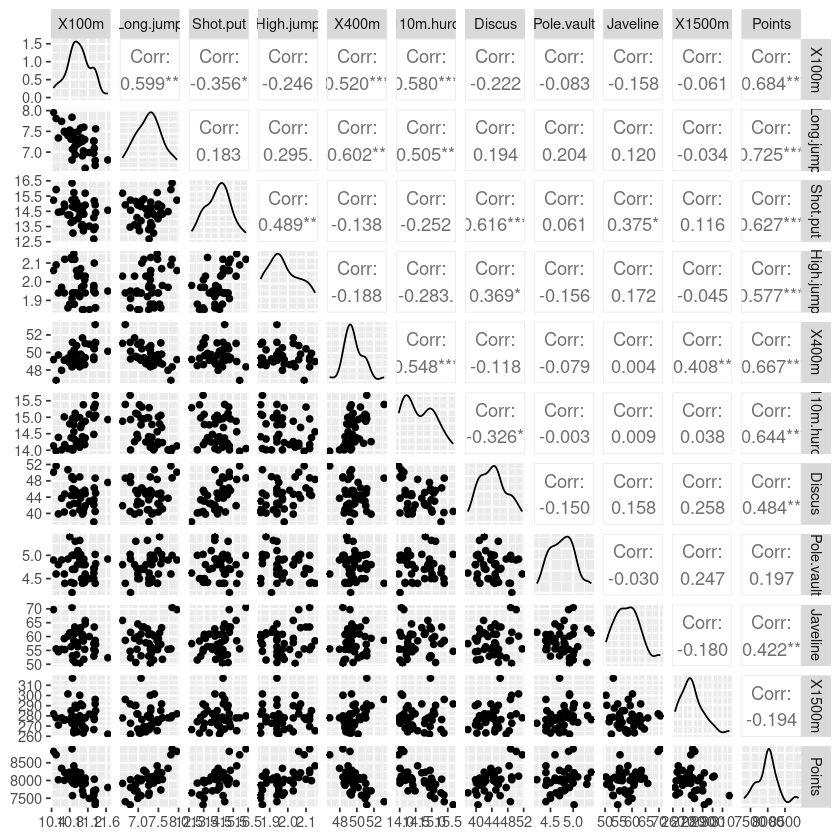

In [6]:
ggpairs(data = deca[,-c(11, 13)])

In [7]:
cor(deca[,-c(11, 13)])

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Points
X100m,1.00000000,-0.59867767,-0.35648227,-0.24625292,0.520298155,0.579888931,-0.2217076,-0.082536834,-0.157746452,-0.06054645,-0.6842724
Long.jump,-0.59867767,1.00000000,0.18330436,0.29464444,-0.602062618,-0.505410086,0.1943101,0.204014112,0.119758933,-0.03368613,0.7251349
Shot.put,-0.35648227,0.18330436,1.00000000,0.48921153,-0.138432919,-0.251615714,0.6157681,0.061181853,0.374955509,0.11580306,0.6273894
High.jump,-0.24625292,0.29464444,0.48921153,1.00000000,-0.187956928,-0.283289090,0.3692183,-0.156180742,0.171880092,-0.04490252,0.5767032
X400m,0.52029815,-0.60206262,-0.13843292,-0.18795693,1.000000000,0.547987756,-0.1178794,-0.079292469,0.004232096,0.40810643,-0.6669400
X110m.hurdle,0.57988893,-0.50541009,-0.25161571,-0.28328909,0.547987756,1.000000000,-0.3262010,-0.002703885,0.008743251,0.03754024,-0.6444602
Discus,-0.22170757,0.19431009,0.61576810,0.36921834,-0.117879365,-0.326200961,1.0000000,-0.150072400,0.157889799,0.25817510,0.4841830
Pole.vault,-0.08253683,0.20401411,0.06118185,-0.15618074,-0.079292469,-0.002703885,-0.1500724,1.000000000,-0.030000603,0.24744778,0.1974363
Javeline,-0.15774645,0.11975893,0.37495551,0.17188009,0.004232096,0.008743251,0.1578898,-0.030000603,1.000000000,-0.18039313,0.4223932
X1500m,-0.06054645,-0.03368613,0.11580306,-0.04490252,0.408106432,0.037540240,0.2581751,0.247447780,-0.180393128,1.00000000,-0.1943486


We observe that the points seem to be positively correlated to the events measured by distance and negatively correlated to events measured in time which makes sense. We can also see some significant correlations between 100m, 400m, 110m hurdle, long jump or between shot put and discus that are events that globaly require the same skills.

In [8]:
deca.norm = as.data.frame(scale(deca[,-c(11, 13)]))

To make the variables easier to use and make time and distance more comparable, we can normalize the data. For example, a short difference in the 100m can represent the same amount of point that some meters in the shot put.

## Régression linéaire simple

On commence par expliquer la variable `Points` par la variable `Shot.put` qui mesure la longueur au lancer du poids.

**Question 2**:
- Écrivez avec une formule mathématique le modèle correspondant.
- Faites la régression linéaire correspondante et interprétez les sorties. En particulier : 
    - Formulez le test de nullité de chacun des coefficients (donner $H_0, H_1$) et conclure sur chaque test
    - Formulez le F-test sur les modèles emboîtés (donner $H_0, H_1$) et conclure sur ce test  
- Quel pourcentage de variabilité des observations est expliqué par ce modèle ? 


Now we suppose that $$Points_i = \beta_0 + \beta_1 * Shot.put_i + \epsilon_i$$ with $1 \leq i \leq 41$ and $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$ i.i.d

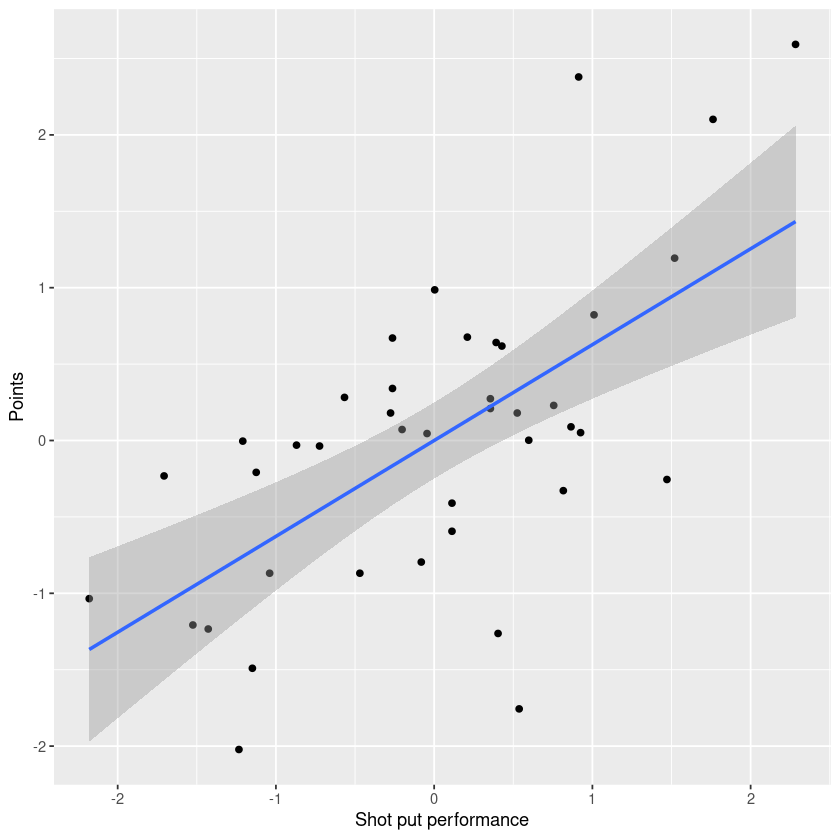

In [9]:
plot1 = ggplot(data = deca.norm, aes(x = Shot.put, y = Points)) + geom_point() + geom_smooth(method='lm', formula='y~x')+ 
    xlab('Shot put performance')+ ylab ( 'Points')
plot1

In [10]:
regShot.put = lm(Points~Shot.put, data = deca.norm)
summary(regShot.put)


Call:
lm(formula = Points ~ Shot.put, data = deca.norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09347 -0.48068  0.07388  0.50584  1.80631 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.709e-16  1.232e-01   0.000        1    
Shot.put    6.274e-01  1.247e-01   5.031 1.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7886 on 39 degrees of freedom
Multiple R-squared:  0.3936,	Adjusted R-squared:  0.3781 
F-statistic: 25.32 on 1 and 39 DF,  p-value: 1.134e-05


- We obtain $\beta_0 = 0$ because the data is normalized and $\beta_1 = 0.6274$

To test if the coefficient $\beta_1$ is significant or not we can test  $$H_0 : \beta_1 = 0 \ against \ H_1 : \beta_1 \neq 0$$

The p-value of this student test is given in the summary 1.13e-05 which means that we reject $H_0$ and accept that $\beta_1 \neq 0$.

The same test for $\beta_0$ gives us the p-value of 1 so we accept $\beta_0 = 0$

- Now to test if the model is significant or not, we test $$H_0 : Points_i = \beta_0 + \epsilon_i \ against \ H_1 : Points_i = \beta_0 + \beta_1 * Shot.put_i + \epsilon_i$$

with the Fisher's law. The result is also given in the summary in the part "F-statistic", the p-value is 1.134e-05 which means that we reject $H_0$ and keep the model $Points_i = \beta_0 + \beta_1 * Shot.put_i + \epsilon_i$

- Finally the Residual standard error is $ S^* = 0.7886$ with 39 degrees of freedom which correspond to $n - r=41 - 2 = 39$ with n the amount of data and r the length of the vector $\beta$

$R^2 = 0.3936$ which is not so much. We can conclude that the Shot put explains 39% of the variability of the Points which is reasonable because the shot put represent only 1 event from the 10 

**Question 3**
- Tracer les graphiques usuels de diagnostic du modèle linéaire portant sur les résidus et commentez les.
- Est-ce que vous voyez des problèmes particuliers ?
- Est-ce qu'il y a des individus qui vous semblent problématiques ? Si oui, pourquoi et étudiez-les de plus près, en particulier visualisez-les sur la droite de régression. 

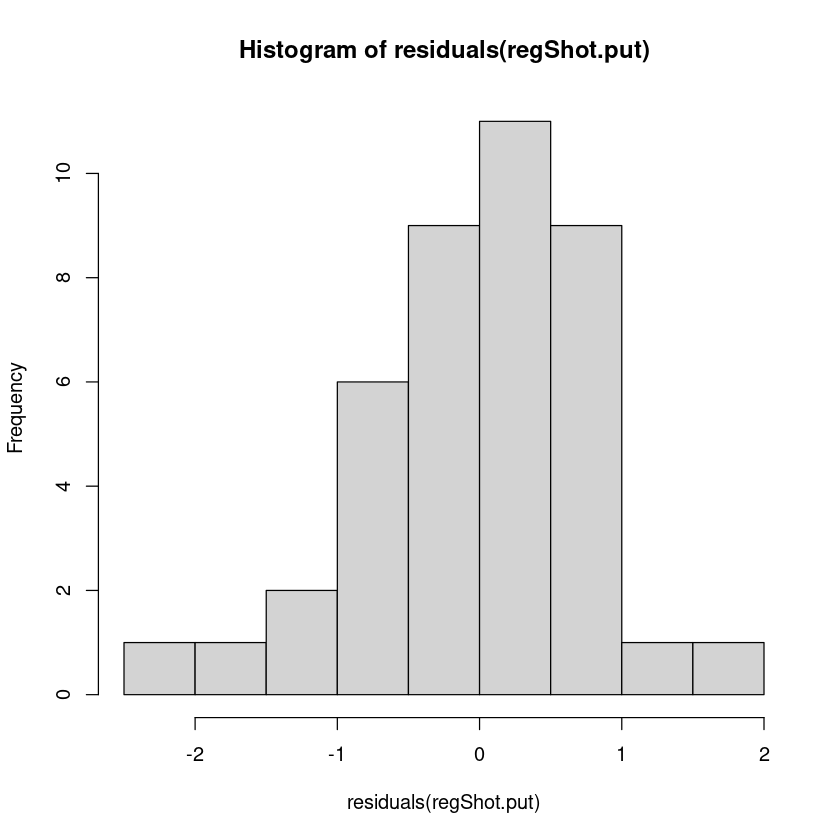

In [11]:
hist(residuals(regShot.put))

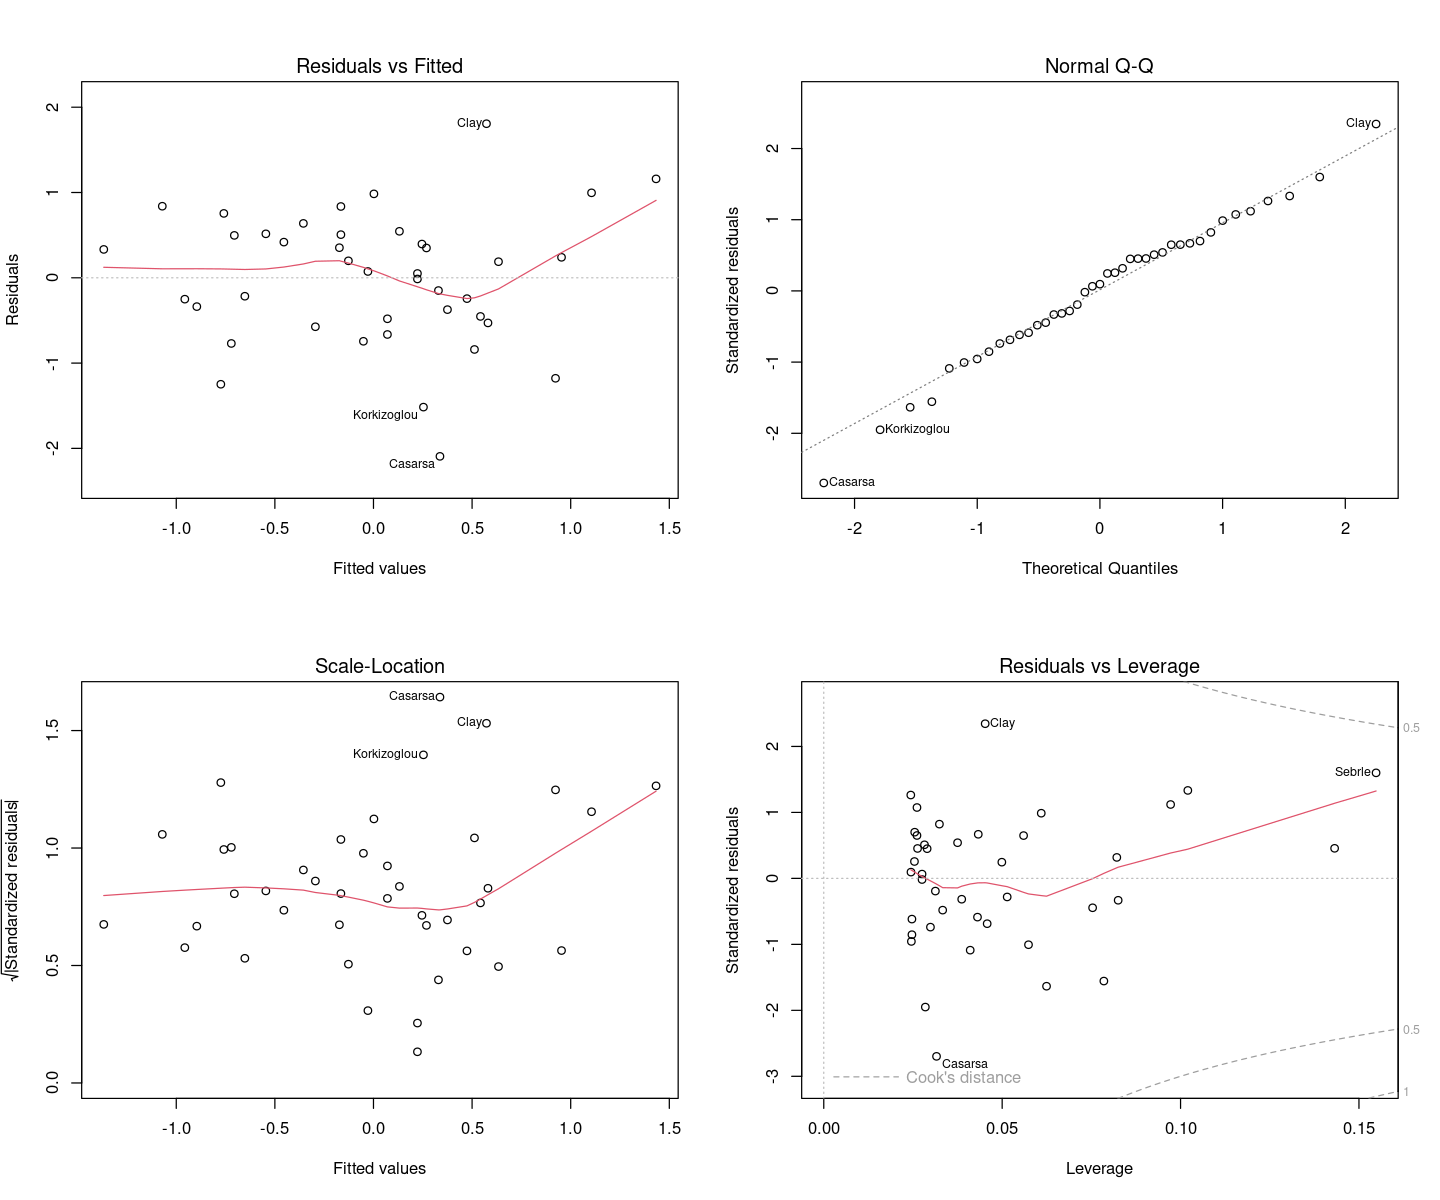

In [12]:
options(repr.plot.width=12, repr.plot.height=10)
par(mfrow=c(2,2))
plot(regShot.put)

With the histogram and the QQ plot, We observe that the residuals seem to be gaussian.

The first and third graphics show that the residuals are not perfectly centered but its looks correct. The points Clay, Korkizoglou and Casarsa are the most problematic.

In the fourth graphic, the most problematic points are Clay, Casarsa and Sebrle but the leverages are not so high and the residials neither.

Actually, Sebrle and Clay are both in the top of the classement and Casarsa, Korkizoglou in the bottom, that's why they are almost concidered as outliers.

In [13]:
deca[c(14,15,39,41),c(11,12)]

,Rank,Points
,<int>,<int>
Sebrle,1,8893
Clay,2,8820
Korkizoglou,26,7573
Casarsa,28,7404


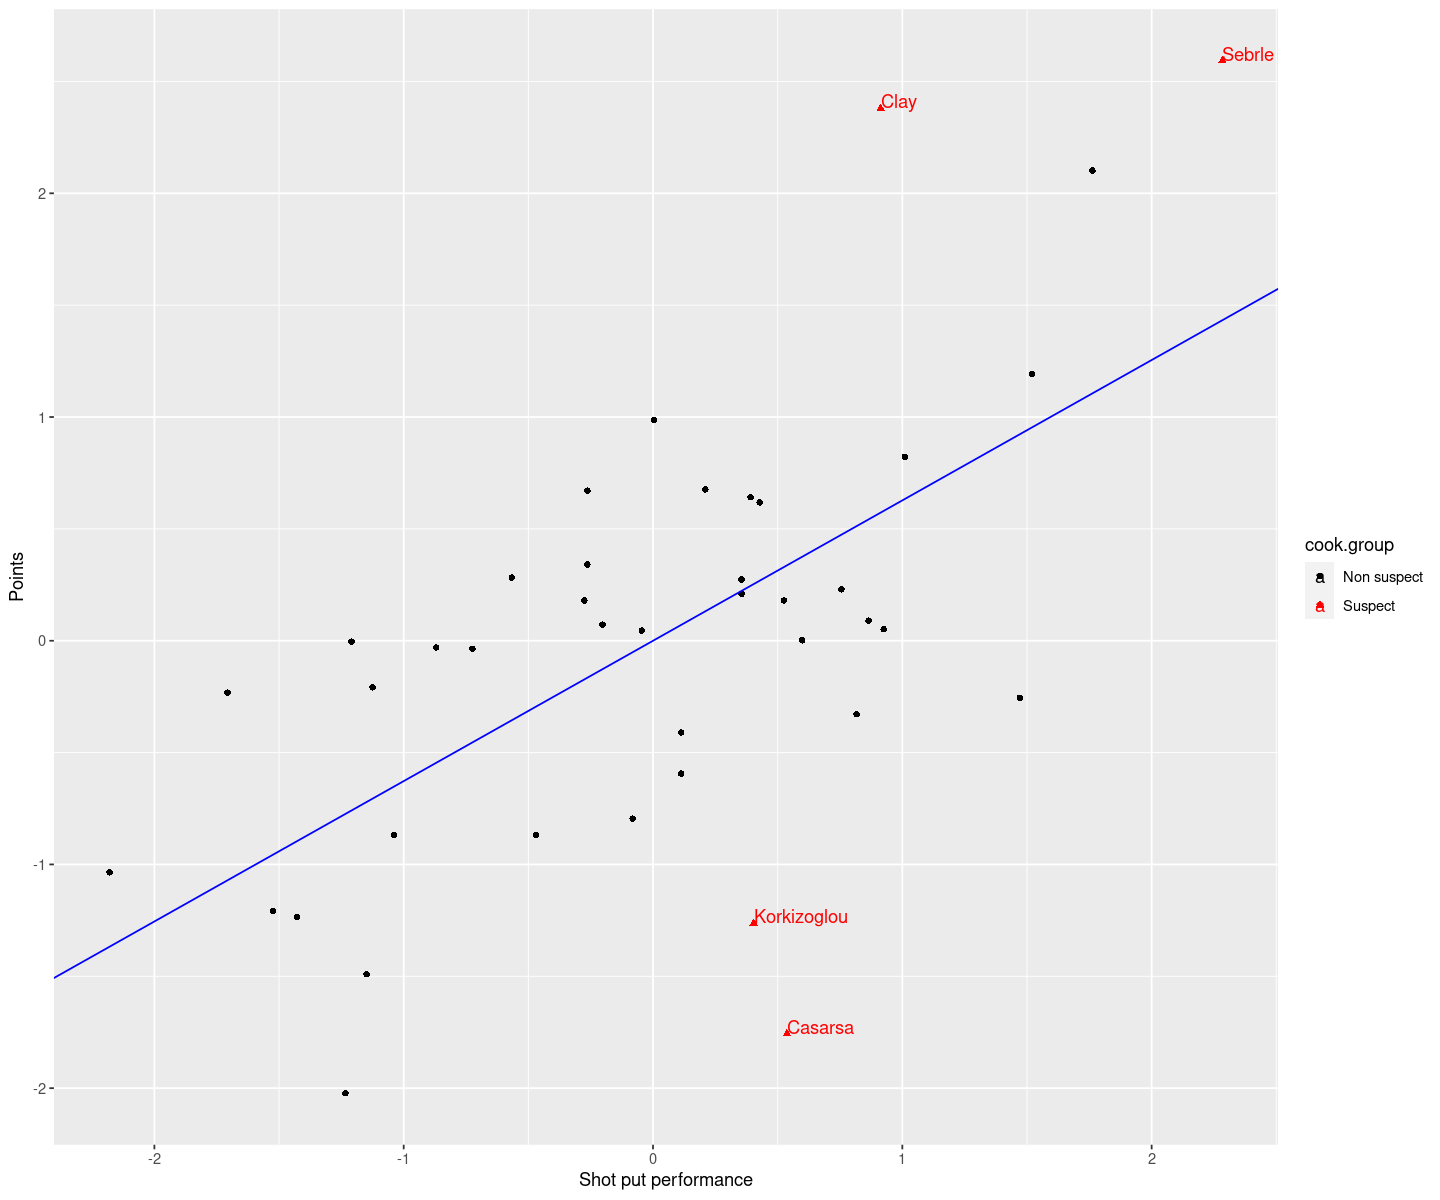

In [14]:
cook.index=c(14,15,39,41)

deca.norm$Id_Cook = rep("",41)
deca.norm$Id_Cook[cook.index] = c("Sebrle", "Clay", "Korkizoglou", "Casarsa")

deca.norm$cook.group = rep("Non suspect",41) 
deca.norm$cook.group[cook.index] = "Suspect"

plot3 = ggplot(data = deca.norm) + aes(x = Shot.put, y = Points, col=cook.group, shape=cook.group) +geom_point() +  
    scale_color_manual(values = c('black', 'red')) + 
    geom_abline(intercept = regShot.put$coefficients[1], slope = regShot.put$coefficients[2], col = 'blue') + 
    xlab('Shot put performance')+ ylab ( 'Points') + 
    geom_text(aes(label=Id_Cook),hjust=0, vjust=0)
plot3

## Régression linéaire multiple

On va maintenant s'intéresser à une régression linéaire multiple pour expliquer la variable `Points` en fonction des 10 variables quantitatives qui donnent les performances des athlètes à chacune des épreuves.

**Question 4**
- Écrivez avec une formule mathématique le modèle correspondant. 
- Faites la régression correspondante et interprétez les sorties. En particulier : 
    - Formulez le test de nullité de chacun des coefficients (donner $H_0, H_1$) et conclure sur chaque test. 
    - Formulez le F-test sur les modèles emboîtés qui compare le modèle minimal contre le modèle maximal de regression multiple (donner $H_0, H_1$) et conclure sur ce test. 
- Quel pourcentage de variabilité des observations est expliqué par ce modèle ? 

Now we consider the linear model: $$Points_i = \beta_0 + \sum_{j=1}^{10} \beta_j  X_{i,j} +\epsilon_i$$ with $1 \leq i \leq 41$, $1 \leq j \leq 10$ and $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$ i.i.d

$X_{i,j}$ is the performance from ith athlete in the jth event

In [15]:
deca.norm = as.data.frame(scale(deca[,-c(11, 13)]))

In [16]:
mod <- lm(Points~., data = deca.norm)
sort(vif(mod))

Javeline   Pole.vault    High.jump X110m.hurdle       X1500m       Discus 
    1.387883     1.424817     1.541358     1.930953     2.074612     2.204006 
   Long.jump        X100m     Shot.put        X400m 
    2.271123     2.326056     2.516412     2.869737

- First we verify that each variance inflation factor is lower than 5 with the library "car". In theory, one performance on one event doesn't affect the other events so the variables shouldn't be highly correlated even with the personnals skills like we talked about before. And, this is what we observe, the higher value is 2.86973712644663 so we keep all the variables.

In [17]:
summary(mod)


Call:
lm(formula = Points ~ ., data = deca.norm)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.018587 -0.006584 -0.001227  0.006591  0.016875 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.358e-15  1.573e-03    0.00        1    
X100m        -1.754e-01  2.429e-03  -72.21   <2e-16 ***
Long.jump     2.233e-01  2.400e-03   93.03   <2e-16 ***
Shot.put      1.478e-01  2.527e-03   58.47   <2e-16 ***
High.jump     2.338e-01  1.978e-03  118.25   <2e-16 ***
X400m        -1.584e-01  2.698e-03  -58.71   <2e-16 ***
X110m.hurdle -1.648e-01  2.213e-03  -74.48   <2e-16 ***
Discus        2.089e-01  2.365e-03   88.34   <2e-16 ***
Pole.vault    2.412e-01  1.901e-03  126.86   <2e-16 ***
Javeline      2.111e-01  1.877e-03  112.49   <2e-16 ***
X1500m       -2.088e-01  2.294e-03  -90.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01007 on 30 degrees of freedom
Multiple R-squared:  0.

- The test of the global significance of the model is given by the F-statistic and the p-value is low, 2.2e-16 so we can conclude that there is at least one coefficient that is non zero.

- Again, the coefficient $\beta_0 = 0$ due to the normalization and it is confirmed by the test with a p-value of 1 so we keep $H_0 : \beta_0 = 0$

The other coefficients $\beta_j$ are all significant, with a p-value of 2e-16 so we can reject $H_0$ and consider $H_1: \beta_j \neq 0, \forall j \in [1, 10]$ 

- Finally, the Residual standard error is 0.01007 with 30 degrees of freedom which is still $n-r = 41 - 11 = 30$ with this time $r=11$ because the length of $\beta$ is 11, $j \in [0, 10]$

$R^2$ is almost equal to 1 which means that the model completly explains the variable Points. In fact, The variable Points is only composed from the performance of the 10 events so it is perfectly logic that the model explains all variability of the Points.

# Jeu de données Brochets - Regression Polynomiale
Dans cette partie, on travaille sur le jeu de données `Brochet.txt` disponible sous Moodle. 
Pour étudier la possible bioaccumulation d'un pesticide appelé le DDT chez les brochets, on a mesuré le taux de DDT (variable `TxDDT`) dans la chair de brochets de différents âges (variable `Age`), capturés dans une même rivière. On cherche à décrire la relation potentielle entre le taux de DDT et l'âge des brochets. 

**Question 5**

Chargez les données et faites une rapide analyse descriptive des variables.  


In [18]:
brochet = read.table('Brochet.txt',header=TRUE)
head(brochet)
dim(brochet)
names(brochet)

,Obs,Age,TxDDT
,<int>,<int>,<dbl>
1,1,2,0.20
2,2,2,0.25
3,3,2,0.18
4,4,3,0.19
5,5,3,0.29
6,6,3,0.28


[1] 15  3

[1] "Obs"   "Age"   "TxDDT"

In [19]:
sum(is.na(brochet))

[1] 0

In [20]:
brochet = brochet[,-c(1)]

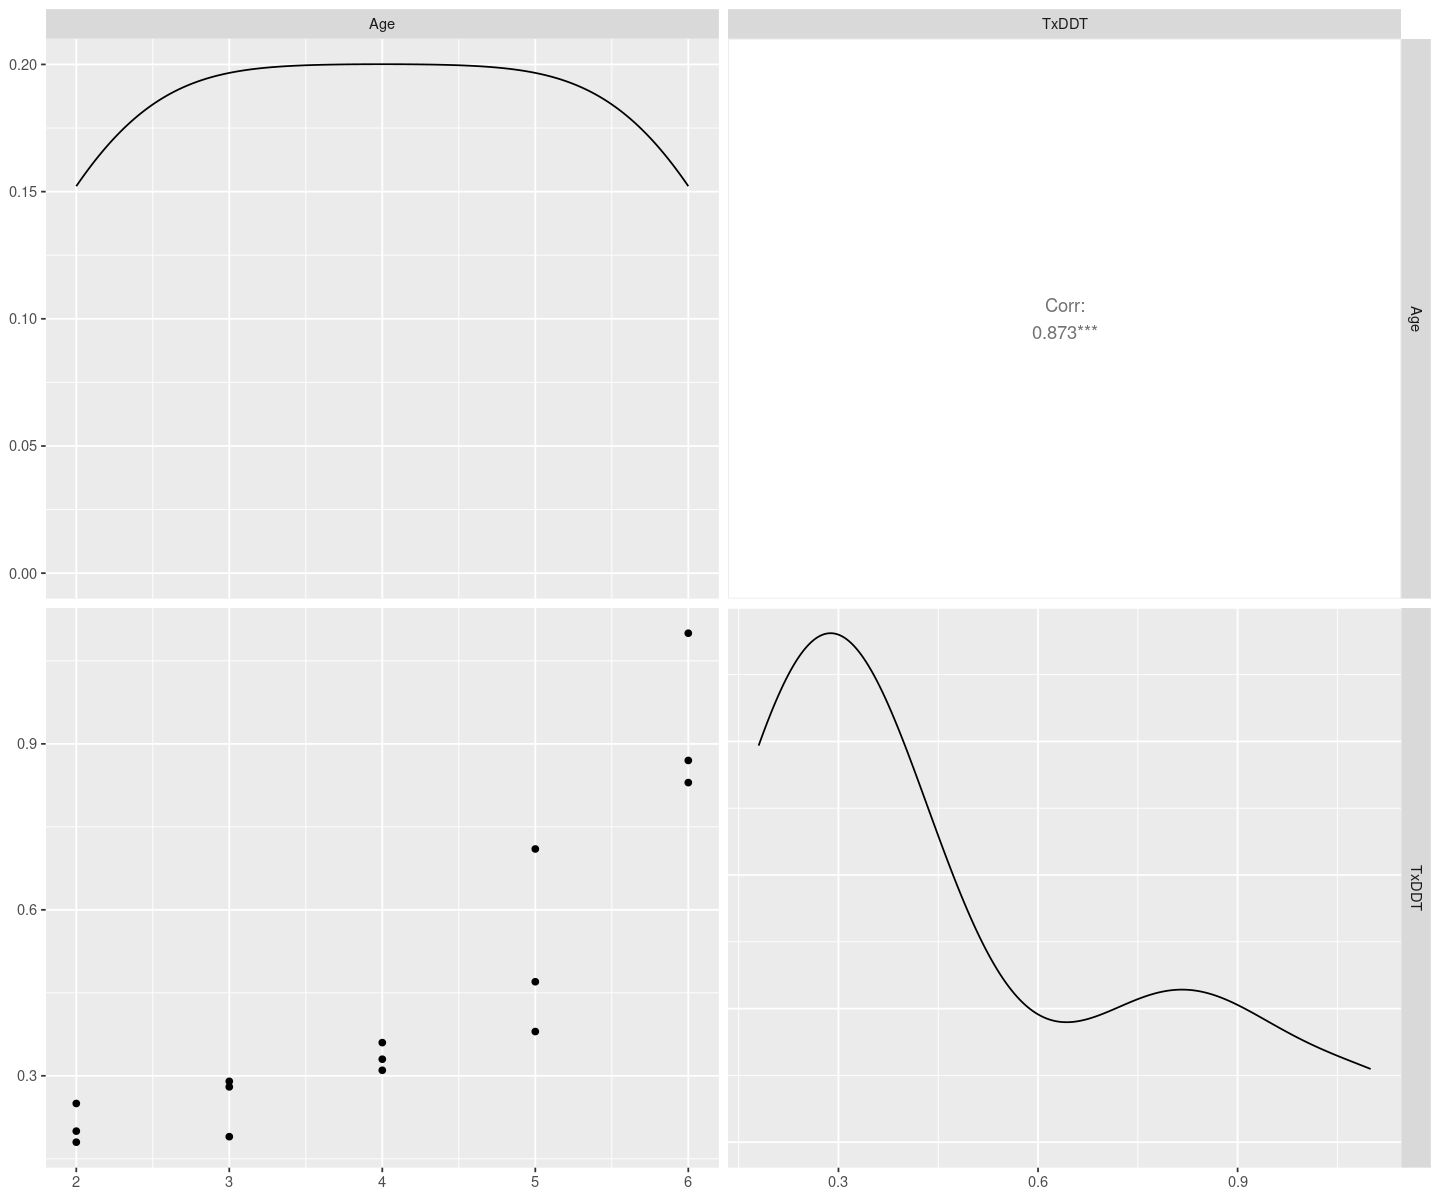

In [21]:
ggpairs(data = brochet)

There are 15 values, no missing data. The variables Age and TxDDT seem to be correlated. This time, it doesn't look like relevant to normalize the data so we just remove the column Obs.

**Question 6**

On souhaite faire une régression polynomiale d'ordre 2 de la variable `TxDDT` sur la variable `Age`; i.e pour le $i$ème individu, on écrit

$$
TxDDT_i = \beta_0 +\beta_1 * Age_i + \beta_2* Age_i ^2 + \varepsilon_i
$$

- Présentez au moins deux manières (deux lignes de codes) différentes pour effectuer la régression polynomiale sous R.
- Interpréter les résultats.
- Visualiser le diagnostic simple des résidus. 


In [22]:
brochet$Age_sq = brochet$Age^2
dim(brochet)
head(brochet)

[1] 15  3

,Age,TxDDT,Age_sq
,<int>,<dbl>,<dbl>
1,2,0.20,4
2,2,0.25,4
3,2,0.18,4
4,3,0.19,9
5,3,0.29,9
6,3,0.28,9


In [23]:
mod2 = lm(TxDDT ~ ., data = brochet)
summary(mod2)


Call:
lm(formula = TxDDT ~ ., data = brochet)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18086 -0.04595 -0.01905  0.04638  0.18638 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.61133    0.23096   2.647  0.02130 * 
Age         -0.31248    0.12558  -2.488  0.02853 * 
Age_sq       0.06048    0.01553   3.894  0.00213 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1006 on 12 degrees of freedom
Multiple R-squared:  0.8948,	Adjusted R-squared:  0.8773 
F-statistic: 51.06 on 2 and 12 DF,  p-value: 1.352e-06


- First, we can just add another column with ages to the square and do the classic linear regression.

In [24]:
mod3 = lm(TxDDT ~ poly(Age, 2), data = brochet)

summary(mod3)


Call:
lm(formula = TxDDT ~ poly(Age, 2), data = brochet)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18086 -0.04595 -0.01905  0.04638  0.18638 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.45000    0.02598  17.318 7.44e-10 ***
poly(Age, 2)1  0.93843    0.10064   9.325 7.58e-07 ***
poly(Age, 2)2  0.39193    0.10064   3.894  0.00213 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1006 on 12 degrees of freedom
Multiple R-squared:  0.8948,	Adjusted R-squared:  0.8773 
F-statistic: 51.06 on 2 and 12 DF,  p-value: 1.352e-06


- Or we can add to the argments of the function lm that the regression is polynomial

The results are quite similar. The Residual standard error is the same, 0.1006 with 12 degrees of freedom (15-3 for 3 coefficients $\beta_j$)

$R^2$ is 0.8948 which is good and the F-statistic gives a p-value of 1.352e-06 which is also good so we reject $H_0 : \beta_1 =0 \ and \ \beta_2=0$ and accept that $\beta_1$ or $\beta_2$ is non zero.

The only difference is in the coefficients $\beta_0$, $\beta_1$ and $\beta_2$. I Think that in the first regression, we add another column so the model "doesn't know" the relationship between these two columns in contrary to the second case in which we precise to the model that the regression is polynomial of order 2. We observe that $\beta_1$ is negative in the first model but positive in the second. we will keep the second model because it looks like more relevant. So, in the second model, each coefficient is significant because all the p-values are small, so we keep our model.

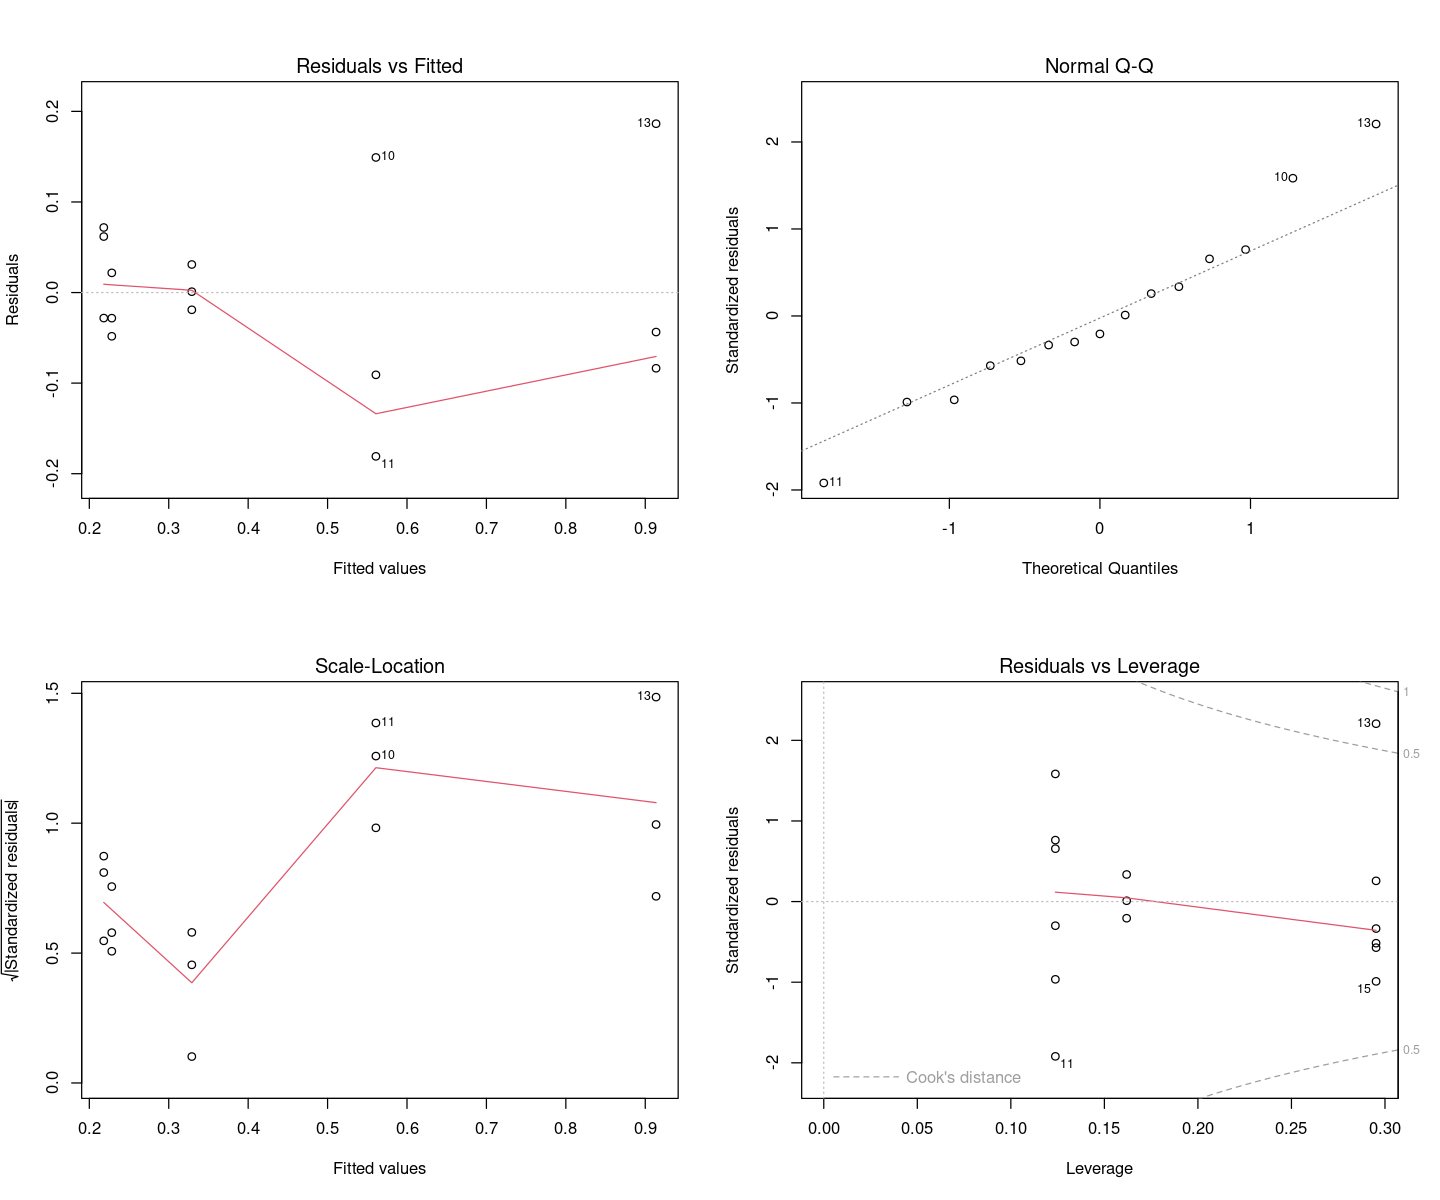

In [25]:
par(mfrow=c(2,2))
plot(mod3)

The graphics 1 and 3 show that the residuals are not really centered, the second one shows that it is approximatly normal and the last one that there are not so much leverage. The points that we have to be careful of are 10, 11, 13, 15 but it is globally acceptable because the amount of data is small.

**Question 7**

On transforme la variable `DDT`en $\log(DDT)$. Faites la  régression de cette nouvelle variable sur la variable `Age^2` et visualisez les diagnostics de résidus. Que constatez-vous ?

In [26]:
brochet$TxDDT = log(brochet$TxDDT)

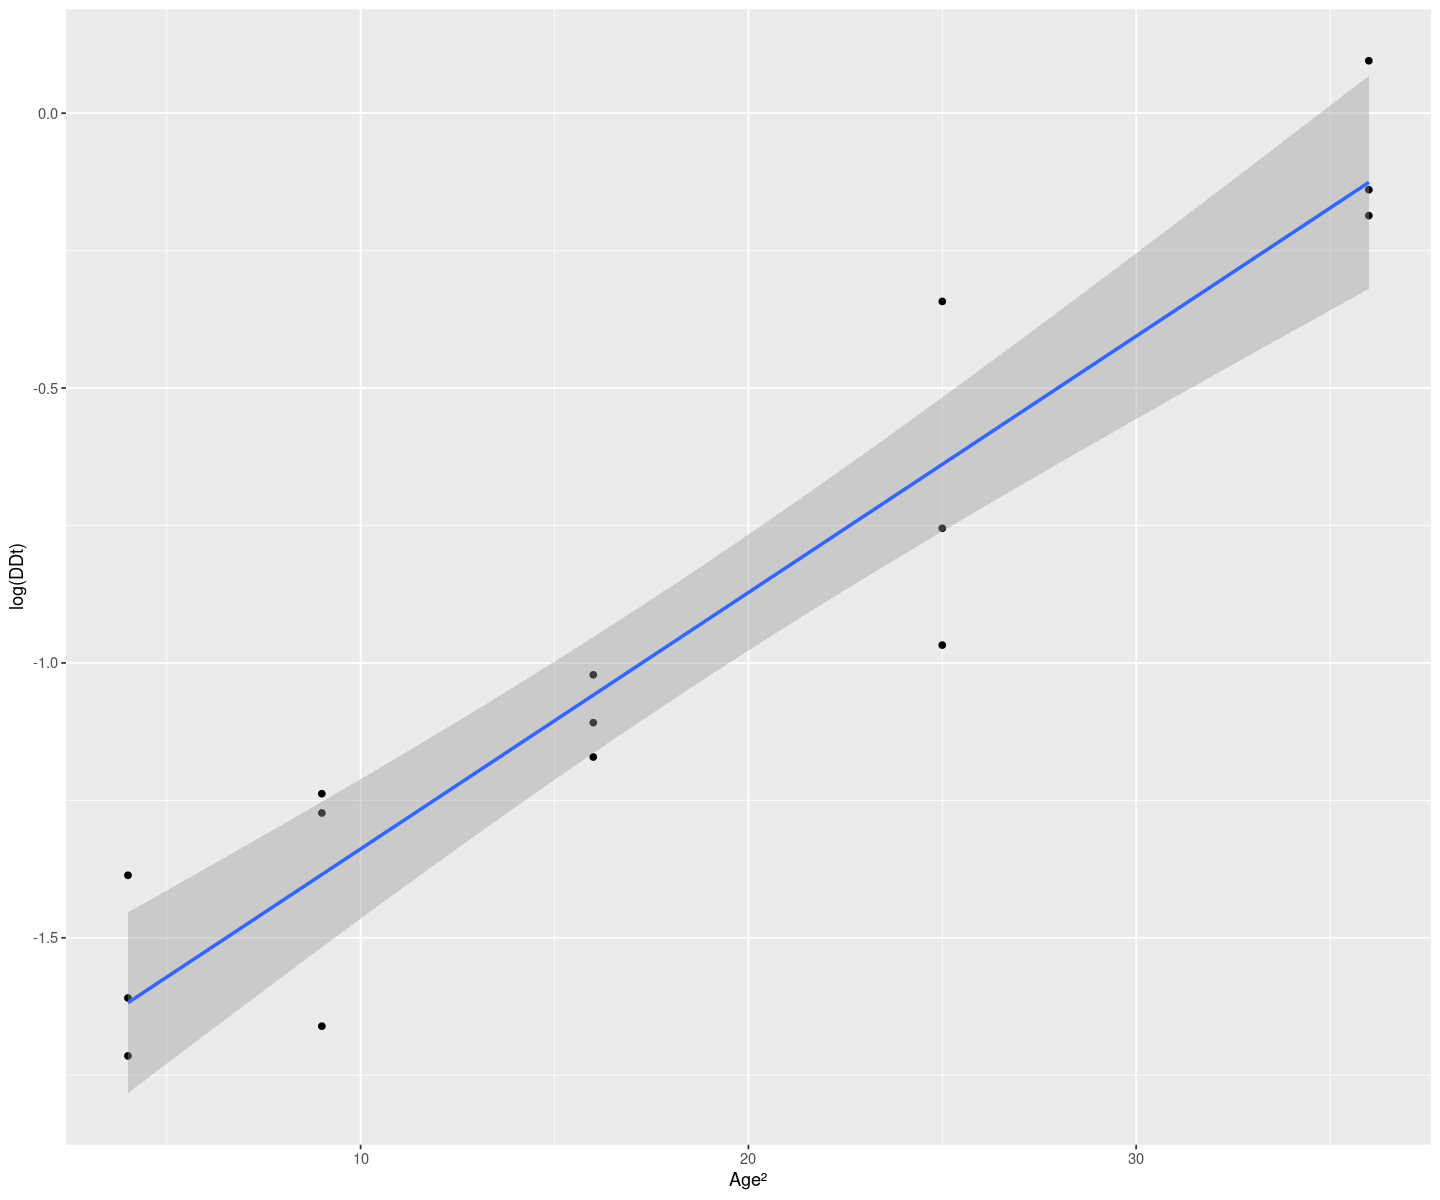

In [27]:
plot4 = ggplot(data = brochet, aes(x = Age_sq, y = TxDDT)) + geom_point() + geom_smooth(method='lm', formula='y~x')+ 
    xlab('Age²')+ ylab ( 'log(DDt)')
plot4

In [28]:
mod4 = lm(TxDDT ~ Age_sq, data = brochet)
summary(mod4)


Call:
lm(formula = TxDDT ~ Age_sq, data = brochet)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32875 -0.10466 -0.01339  0.12954  0.29634 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.80466    0.08979  -20.10 3.57e-11 ***
Age_sq       0.04663    0.00421   11.08 5.43e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1865 on 13 degrees of freedom
Multiple R-squared:  0.9042,	Adjusted R-squared:  0.8968 
F-statistic: 122.7 on 1 and 13 DF,  p-value: 5.429e-08


We observe that this model fits very well, $R^2 = 0.9042$ and is even higher than in the previous model, the coefficients are significant with small p-values and the F statistic confirms that $\beta_1$ is non zero with a p-value of 5.429e-08

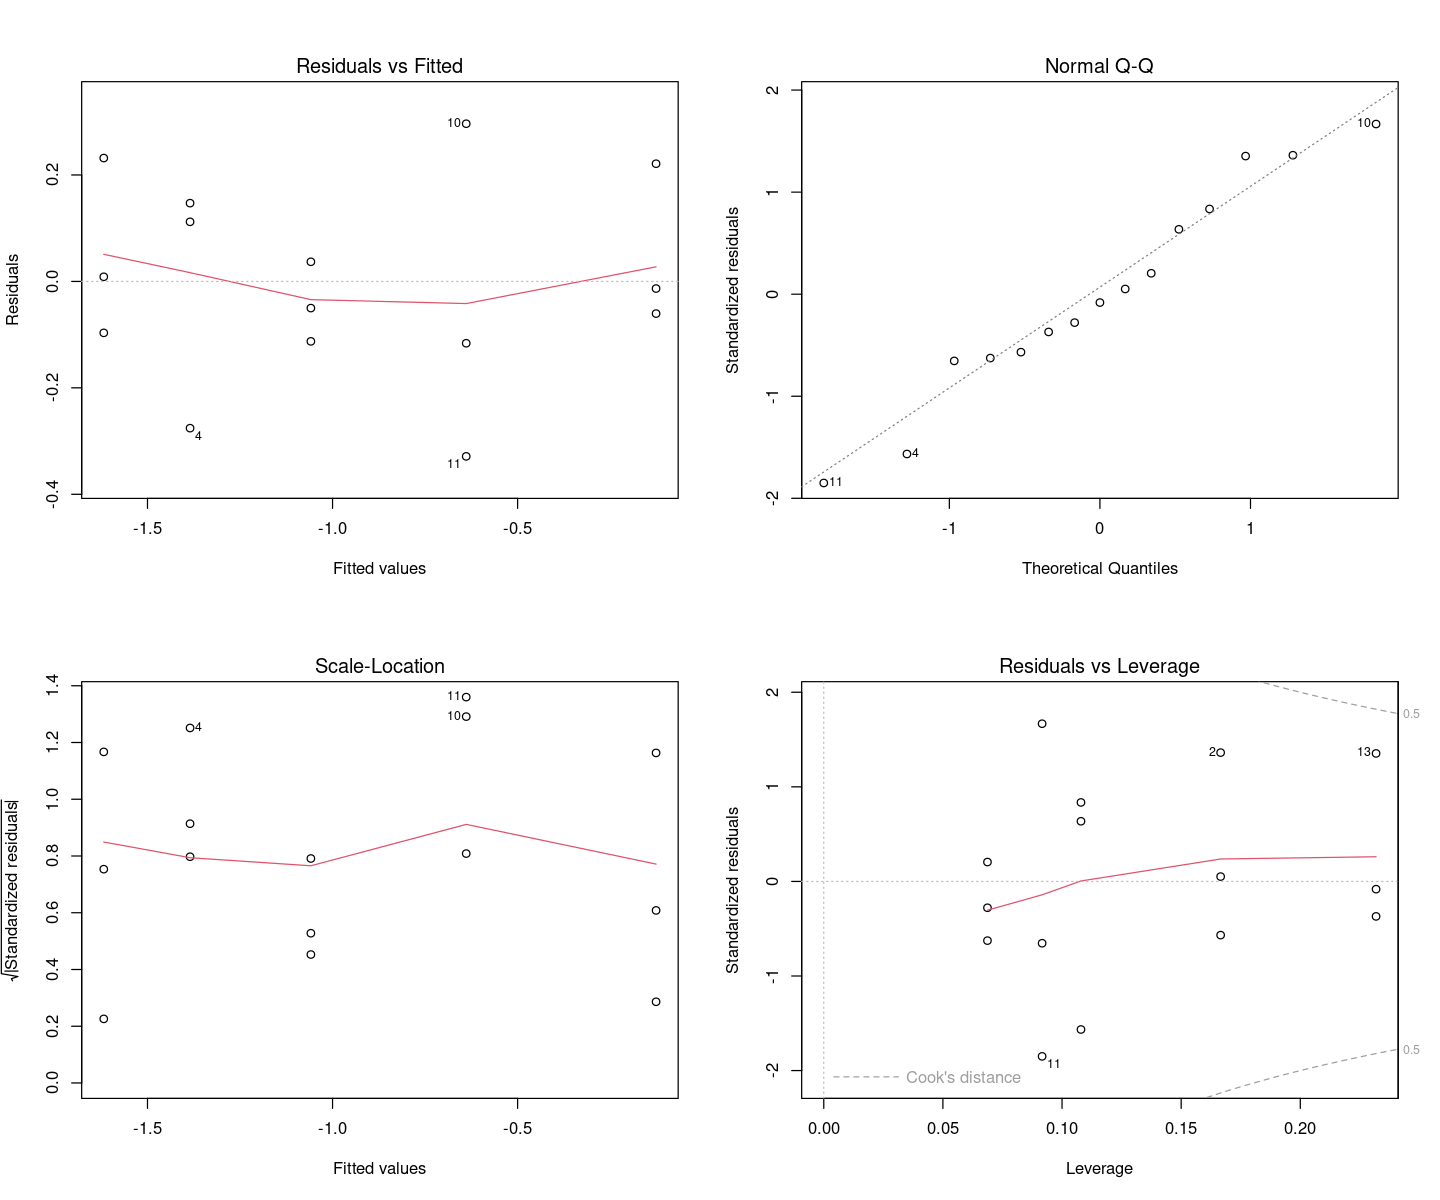

In [29]:
par(mfrow=c(2,2))
plot(mod4)

We observe that the residuals are also looking better. In the first and third graphics, the residuals look like uniformly distributed and centered. The second graphics shows that the residuals are not exactly normally distributed but again, the amount of data is low and the laster graphic shows that the leverage of each point is a little lower than just before. The points at the border are the same.

# Régression de Poisson - régression log-linéaire

La régression de Poisson est une technique de modélisation qui peut être utilisée pour prédire les comptages. Dans ce cas, nous définissons les effectifs comme le nombre d'occurrences d'un événement dans une période de temps donnée. Une façon équivalente de considérer les chiffres est de considérer les taux. En statistiques, nous utilisons fréquemment la distribution de Poisson lorsque nous travaillons avec des comptages d'événements, et ce concept peut être étendu à la régression. Cette section examinera un modèle de régression pour le nombre de cyclistes qui traversent un pont à New York, basé sur des variables prédictives qui incluent le jour de la semaine, la température (haute et basse), et la présence de précipitations.

## NYC Bicycle counts
L'ensemble de données contient 214 observations et 6 variables :

 * `doy` : Jour de l'année
 * `weekday` : Jour de la semaine
 * `hightemp` : La température maximale quotidienne
 * `lowtemp` : La température basse du jour
 * `precip_trace` : La quantité de précipitation
 * `precip_snow` : La quantité de précipitations sous forme de neige 
 * `count` : Le nombre de cyclistes qui passent par jour sur le pont de Williamburg à New York 
 * `count_scaled` : Le nombre de cyclistes qui passent par jour sur le pont de Williamburg à New York divisé par 1000

Le jeu de données est disponible dans le fichier nyc_bike_counts.csv disponible sous Moodle. 


**Question 8** 

* Chargez les données dans une dataframe et changer le type de la colonne `count_scaled`, pour qu'elle contienne uniquement des entiers. 
* Faites ensuite une analyse exploratoire des données en examinant la distribution de la variable `count` en fonction de la variable catégorielle, le jour de la semaine.
* Faites une analyse des variables quantitatives `hightemp`, `lowtemp`, `precip_rain`, `precip_snow` et `count`. On pourra notamment regarder les corrélations bivariées et commenter les résultats qui semblent pertinents.

In [30]:
bicycle = read.csv('nyc_bike_counts.csv',header=T,sep=",",dec=".")
head(bicycle)
dim(bicycle)
names(bicycle)
summary(bicycle)

,weekday,hightemp,lowtemp,precip_rain,precip_snow,count,count_scaled
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,Friday,78.1,66.0,0.01,0.00,4115,4.115
2,Saturday,55.0,48.9,0.15,0.00,2565,2.565
3,Sunday,39.9,34.0,0.09,0.00,1695,1.695
4,Monday,44.1,33.1,0.00,0.47,1440,1.440
5,Tuesday,42.1,26.1,0.00,0.00,3081,3.081
6,Wednesday,45.0,30.0,0.00,0.00,3856,3.856


[1] 214   7

[1] "weekday"      "hightemp"     "lowtemp"      "precip_rain"  "precip_snow" 
[6] "count"        "count_scaled"

   weekday             hightemp        lowtemp       precip_rain    
 Length:214         Min.   :39.90   Min.   :26.10   Min.   :0.0000  
 Class :character   1st Qu.:66.05   1st Qu.:53.23   1st Qu.:0.0000  
 Mode  :character   Median :78.10   Median :64.90   Median :0.0000  
                    Mean   :74.93   Mean   :61.97   Mean   :0.1069  
                    3rd Qu.:84.90   3rd Qu.:71.10   3rd Qu.:0.0400  
                    Max.   :96.10   Max.   :82.00   Max.   :1.6500  
  precip_snow           count       count_scaled  
 Min.   :0.000000   Min.   :1440   Min.   :1.440  
 1st Qu.:0.000000   1st Qu.:4884   1st Qu.:4.885  
 Median :0.000000   Median :6334   Median :6.335  
 Mean   :0.002196   Mean   :6161   Mean   :6.161  
 3rd Qu.:0.000000   3rd Qu.:7858   3rd Qu.:7.858  
 Max.   :0.470000   Max.   :9148   Max.   :9.148  

In [31]:
sum(is.na(bicycle))

[1] 0

There are 214 values, with no missing data, 6 variables. Hightemp and lowtemp are obviously highly correlated. The only one categorical data is weekday.

In [32]:
days = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
bicycle$weekday = factor(bicycle$weekday, levels = days)
bicycle$count_scaled = as.integer(bicycle$count_scaled)

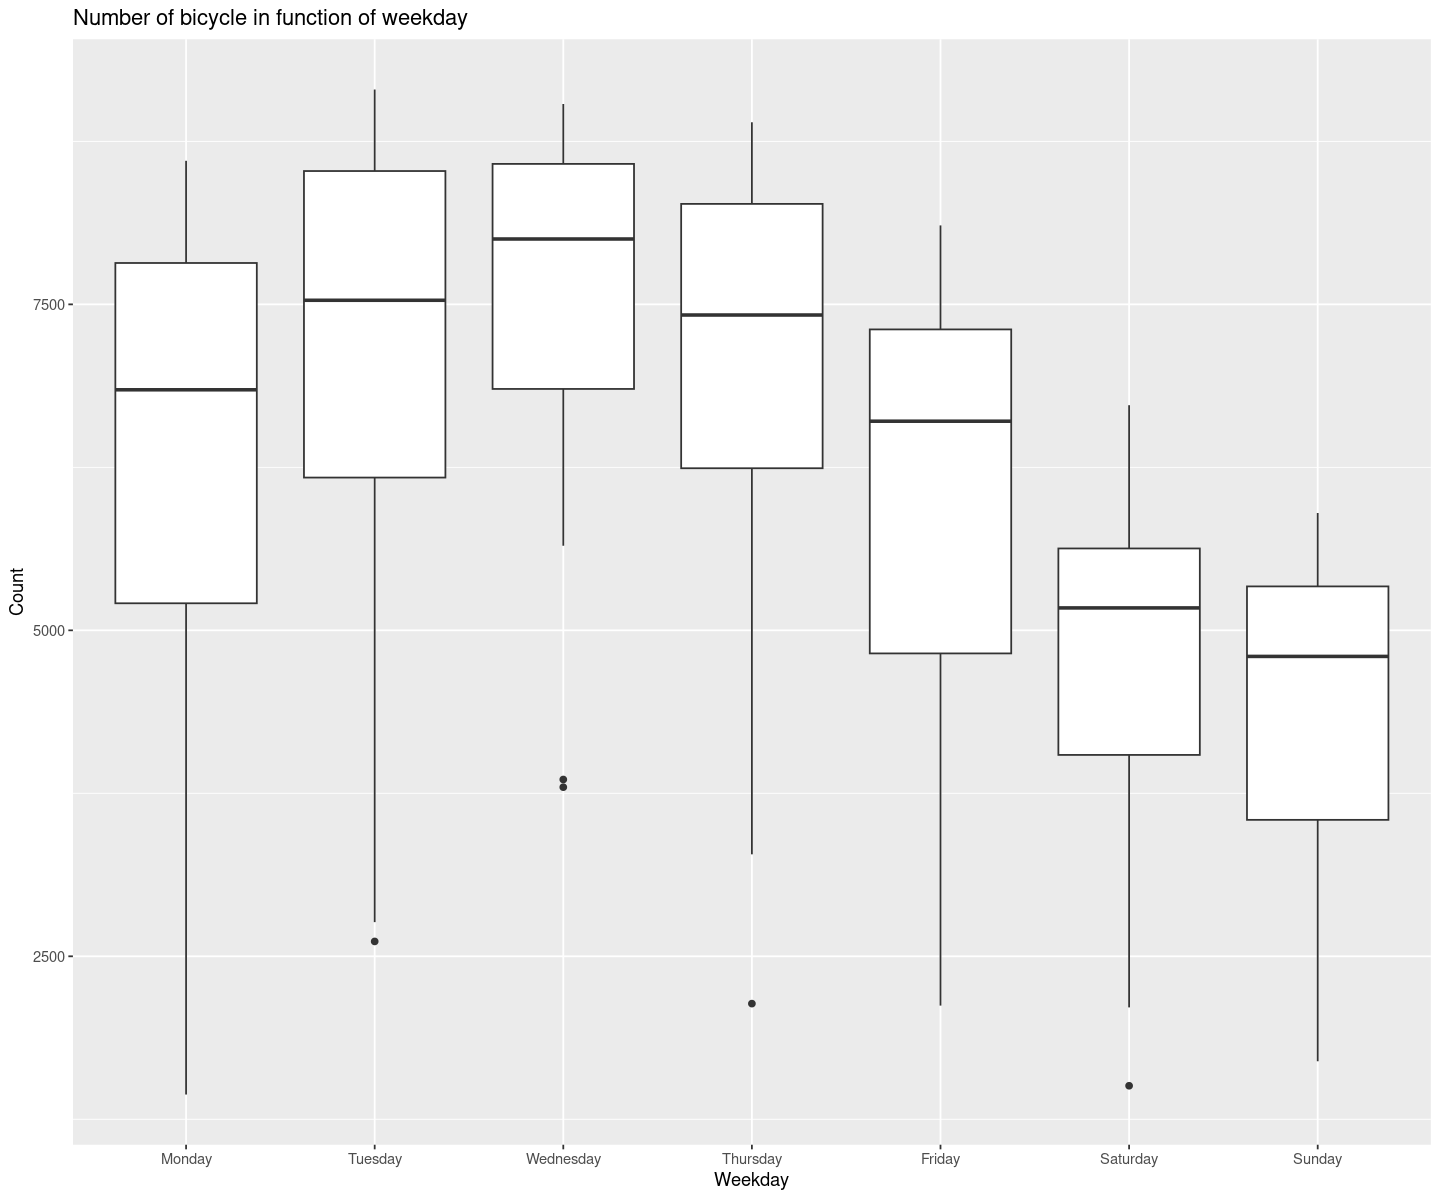

In [33]:
plot5 = ggplot(bicycle) + aes(x=weekday,y=count) + geom_boxplot() + labs(title="Number of bicycle in function of weekday", x="Weekday", y="Count")
plot5

We observe that the amount of bicycle is lower during the weekend than in the week so there are probably a lot of people that use the bike to go working and the peak is Wednesday.

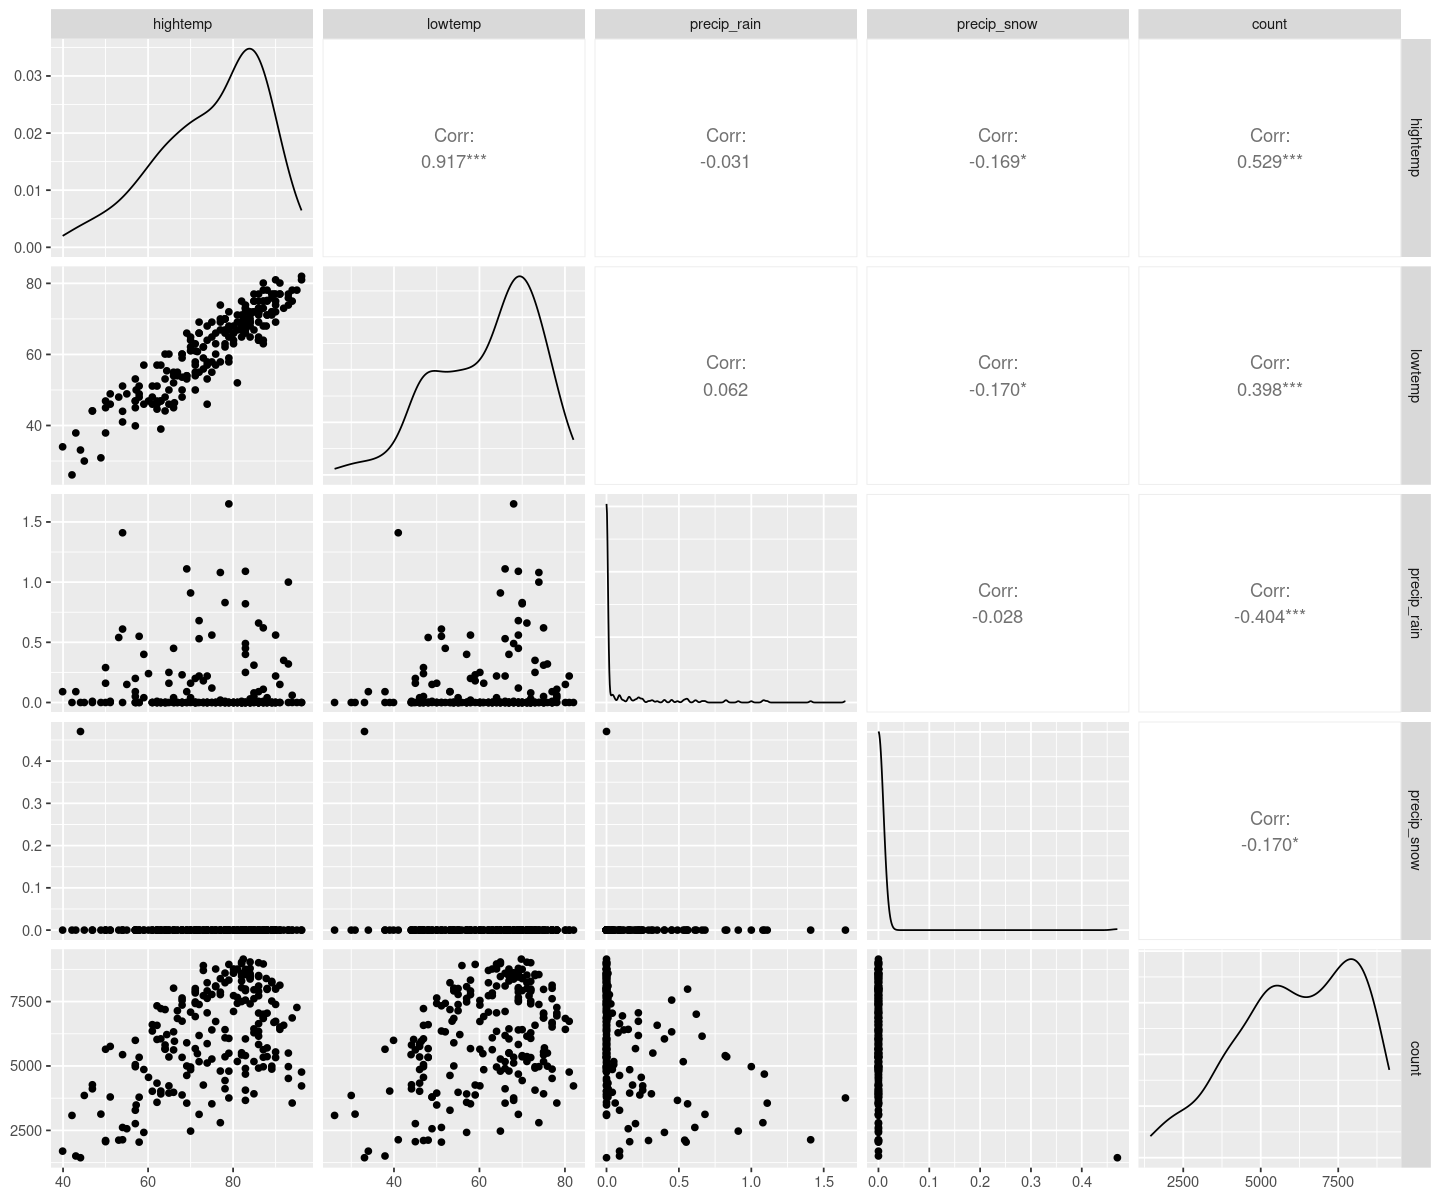

In [34]:
ggpairs(data = bicycle[,2:6])

So we observe that hightemp and lowtemp are highly correlated and the variable count is mostly correlated to hightemp but also lowtemp and negatively to precip_rain. It makes sense because when the temperature is high, people go outside and use the bike instead of the car or the bus etc and when it rains, it is the opposite. The variable precip_snow is also a little negatively correlated but we observe that most of the time the variable is 0. Precip_rain is also often 0 because the median is 0.

## Modèle de régression de Poisson 

On va maintenant s'intéresser à une la régression de poisson pour expliquer des variables `count` et `count_scaled` en fonction des variables explicatives à notre disposition.

**Question 9**

* Étudiez la documentation de la fonction **glm** et faites deux régression de Poisson, l'une pour expliquer la variable `count`, l'autre pour expliquer la variable `count_scaled`.
* Comparer les resultats obtenus en faisant bien attention à la nature de la variables à expliquer.

In [35]:
bicycle_var = bicycle[,1:6]
mod6 = glm(count ~ ., data = bicycle_var, family = poisson())
summary(mod6)


Call:
glm(formula = count ~ ., family = poisson(), data = bicycle_var)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-39.545   -7.662    0.784    8.717   27.325  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       7.8314594  0.0063573 1231.88   <2e-16 ***
weekdayTuesday    0.0874590  0.0031964   27.36   <2e-16 ***
weekdayWednesday  0.1062259  0.0031076   34.18   <2e-16 ***
weekdayThursday   0.0446728  0.0031649   14.12   <2e-16 ***
weekdayFriday    -0.0507203  0.0032754  -15.48   <2e-16 ***
weekdaySaturday  -0.2975688  0.0034424  -86.44   <2e-16 ***
weekdaySunday    -0.3927792  0.0035492 -110.67   <2e-16 ***
hightemp          0.0224908  0.0001900  118.40   <2e-16 ***
lowtemp          -0.0113279  0.0002006  -56.47   <2e-16 ***
precip_rain      -0.4931333  0.0043281 -113.94   <2e-16 ***
precip_snow      -2.5020266  0.0565319  -44.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion

In [36]:
bicycle_var2 = bicycle[,c(1,2,3,4,5,7)]
mod7 = glm(count_scaled ~ ., data = bicycle_var2, family = poisson())
summary(mod7)


Call:
glm(formula = count_scaled ~ ., family = poisson(), data = bicycle_var2)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.49970  -0.27966   0.03794   0.29435   1.05056  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.772570   0.210836   3.664 0.000248 ***
weekdayTuesday    0.109806   0.105283   1.043 0.296964    
weekdayWednesday  0.119603   0.102475   1.167 0.243154    
weekdayThursday   0.073906   0.103999   0.711 0.477304    
weekdayFriday    -0.036112   0.108077  -0.334 0.738278    
weekdaySaturday  -0.310735   0.114367  -2.717 0.006588 ** 
weekdaySunday    -0.439652   0.119159  -3.690 0.000225 ***
hightemp          0.024063   0.006285   3.829 0.000129 ***
lowtemp          -0.012238   0.006629  -1.846 0.064850 .  
precip_rain      -0.541233   0.145774  -3.713 0.000205 ***
precip_snow      -3.039662   2.141074  -1.420 0.155698    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Disp

In the first model, we observe that every coefficient is relevant because all the p-values are lower than 2e-16 but in the second model only the intercept, the information on the weekend, hightemp and precip_rain are significant so the second model is simpler than the first one. The AIC is much better in the second model but it is difficult to compare the results between the two models because the order of magnitude is different.

**Question 10**

Disons que nous sommes un samedi, avec une température maximale de 55 et une température minimale de 28, sans précipitation. Que prédirait notre modèle pour un comptage de cyclistes sur notre pont ? (Vous choisirez pour répondre le modèle qui vous parrait le plus approprié au vu de la question précedente).

In [37]:
xnew = data.frame(weekday= "Saturday", hightemp = 55, lowtemp = 28, precip_rain = 0, precip_snow = 0)

y1 = predict(mod6, newdata = xnew, type = "response")
y1

y2 = predict(mod7, newdata = xnew, type = "response")
y2

1 
4692.424

1 
4.231698

In [38]:
bicycle[bicycle$weekday == "Saturday" & bicycle$hightemp >=45 & bicycle$hightemp <=65,]

,weekday,hightemp,lowtemp,precip_rain,precip_snow,count,count_scaled
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
2,Saturday,55.0,48.9,0.15,0,2565,2
30,Saturday,64.0,48.0,0.00,0,5675,5
37,Saturday,57.9,48.9,0.00,0,3789,3
184,Saturday,62.1,57.0,0.00,0,3590,3
198,Saturday,64.9,46.0,0.00,0,5350,5
205,Saturday,50.0,46.9,0.29,0,2108,2
212,Saturday,63.0,39.0,0.00,0,4027,4


In conclusion, The first model predicts 4692 people while the second one predicts 4231 people so they seem to be both quite accurate when comparing to the old similar values.